In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer


In [59]:
%%time
# Read in the s&p dataset
stocks = pd.read_csv('sp500.csv')

CPU times: total: 15.6 ms
Wall time: 13 ms


In [60]:
# Print info about dataset
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idnumber             493 non-null    int64  
 1   exchange             493 non-null    object 
 2   symbol               493 non-null    object 
 3   shortname            493 non-null    object 
 4   longname             493 non-null    object 
 5   longnamesort         493 non-null    object 
 6   sector               493 non-null    object 
 7   industry             493 non-null    object 
 8   prices               493 non-null    float64
 9   marketcap            493 non-null    float64
 10  ebitda               463 non-null    float64
 11  revenuegrowth        492 non-null    float64
 12  city                 493 non-null    object 
 13  state                474 non-null    object 
 14  country              493 non-null    object 
 15  fulltimeemployees    486 non-null    flo

In [61]:
stocks.head()

,idnumber,exchange,symbol,shortname,longname,longnamesort,sector,industry,prices,marketcap,ebitda,revenuegrowth,city,state,country,fulltimeemployees,longbusinesssummary,weight,esgrating,logo
0,1,NYQ,MMM,3M Company,3M Company,3MCompany,Industrials,Conglomerates,116.64,6.457354e+10,8.615999e+09,-0.028,Saint Paul,MN,United States,95000.0,3M Company operates as a diversified technolog...,0.001863,249,https://stockapplogobucket.s3.eu-west-1.amazon...
1,2,NYQ,ABT,Abbott Laboratories,Abbott Laboratories,AbbottLaboratories,Healthcare,Medical Devices,104.09,1.820000e+11,1.395100e+10,0.101,North Chicago,IL,United States,113000.0,"Abbott Laboratories, together with its subsidi...",0.005260,254,https://stockapplogobucket.s3.eu-west-1.amazon...
2,3,NYQ,ABBV,AbbVie Inc.,AbbVie Inc.,AbbVieInc,Healthcare,Drug Manufacturers General,142.66,2.520000e+11,2.717000e+10,0.045,North Chicago,IL,United States,50000.0,"AbbVie Inc. discovers, develops, manufactures,...",0.007278,114,https://stockapplogobucket.s3.eu-west-1.amazon...
3,4,NMS,ABMD,"ABIOMED, Inc.","Abiomed, Inc.",AbiomedInc,Healthcare,Medical Devices,257.87,1.172300e+10,2.792610e+08,0.097,Danvers,MA,United States,2003.0,"Abiomed, Inc. engages in the research, develop...",0.000338,958,https://stockapplogobucket.s3.eu-west-1.amazon...
4,5,NYQ,ACN,Accenture plc,Accenture plc,Accentureplc,Technology,Information Technology Services,274.98,1.740000e+11,1.004265e+10,0.218,Dublin,NaN,Ireland,710000.0,"Accenture plc, a professional services company...",0.005023,785,https://stockapplogobucket.s3.eu-west-1.amazon...


In [62]:
stocks.shape

(493, 20)

In [63]:
stocks.columns

Index(['idnumber', 'exchange', 'symbol', 'shortname', 'longname',
       'longnamesort', 'sector', 'industry', 'prices', 'marketcap', 'ebitda',
       'revenuegrowth', 'city', 'state', 'country', 'fulltimeemployees',
       'longbusinesssummary', 'weight', 'esgrating', 'logo'],
      dtype='object')

In [64]:
stocks.describe(include='O')

,exchange,symbol,shortname,longname,longnamesort,sector,industry,city,state,country,longbusinesssummary,logo
count,493,493,493,493,493,493,493,493,474,493,493,493
unique,4,493,490,490,490,11,113,230,38,7,490,492
top,NYQ,MMM,News Corporation,News Corporation,NewsCorporation,Industrials,Utilities Regulated Electric,New York,CA,United States,"News Corporation, a media and information serv...",https://stockapplogobucket.s3.eu-west-1.amazon...
freq,349,1,2,2,2,73,22,40,68,474,2,2


In [65]:
# Remove some columns that won't be used
stocks.drop(['idnumber','longnamesort','prices', 'weight', 'esgrating','logo'], inplace=True, axis=1)

In [66]:
# Re-print info about dataset after columns are removed
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   exchange             493 non-null    object 
 1   symbol               493 non-null    object 
 2   shortname            493 non-null    object 
 3   longname             493 non-null    object 
 4   sector               493 non-null    object 
 5   industry             493 non-null    object 
 6   marketcap            493 non-null    float64
 7   ebitda               463 non-null    float64
 8   revenuegrowth        492 non-null    float64
 9   city                 493 non-null    object 
 10  state                474 non-null    object 
 11  country              493 non-null    object 
 12  fulltimeemployees    486 non-null    float64
 13  longbusinesssummary  493 non-null    object 
dtypes: float64(4), object(10)
memory usage: 54.0+ KB
None


Exchange Distribution

<AxesSubplot: >

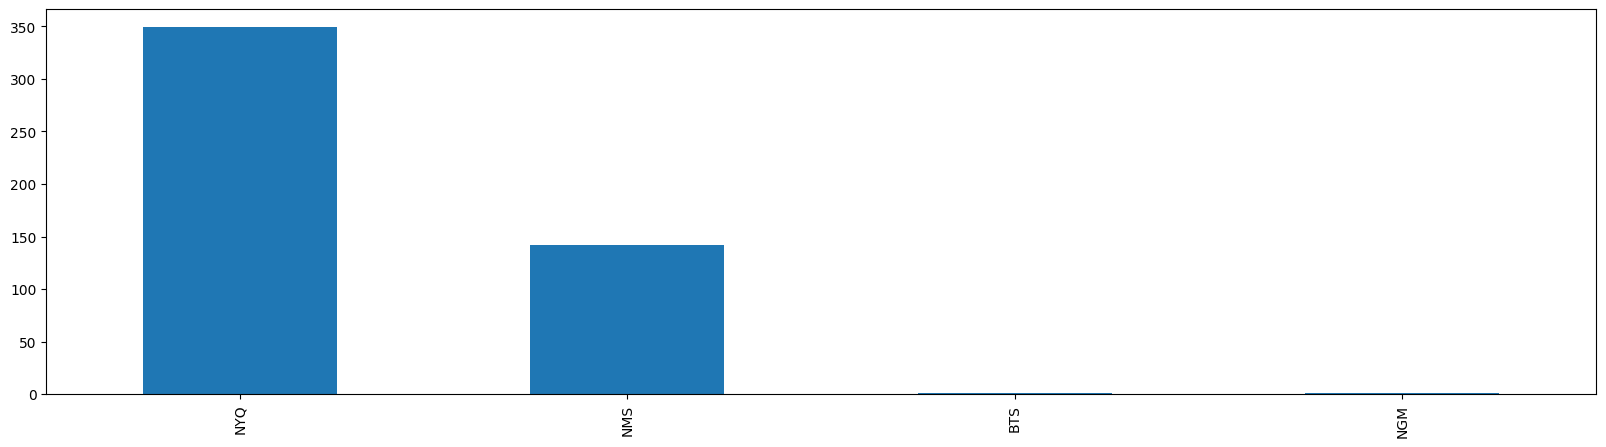

In [67]:
# Create distribution plot of exchanges 
stocks['exchange'].value_counts().plot(x = 'exchange', y ='count', kind = 'bar', figsize = (20,5))

Sector Distribution

<AxesSubplot: >

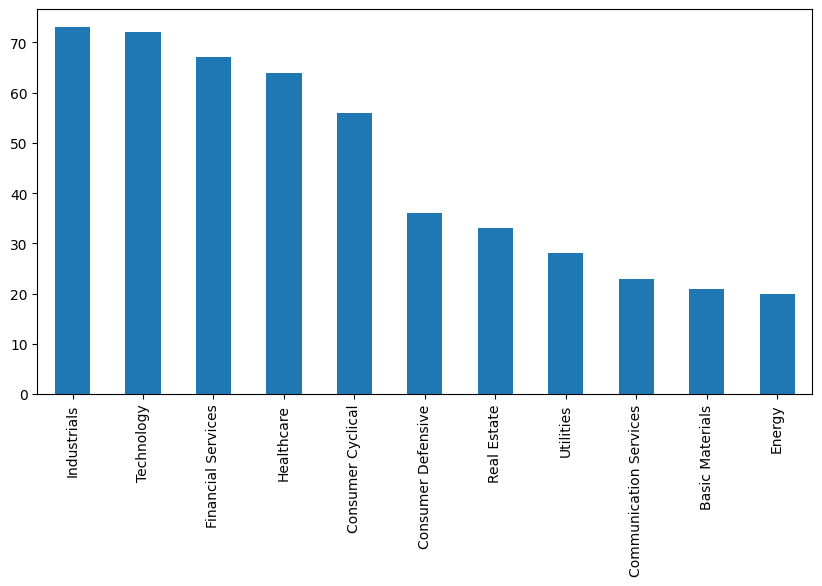

In [68]:
# Create distribution plot of sectors 
stocks['sector'].value_counts().plot(x = 'sector', y ='count', kind = 'bar', figsize = (10,5))

Industry Distribution

<AxesSubplot: >

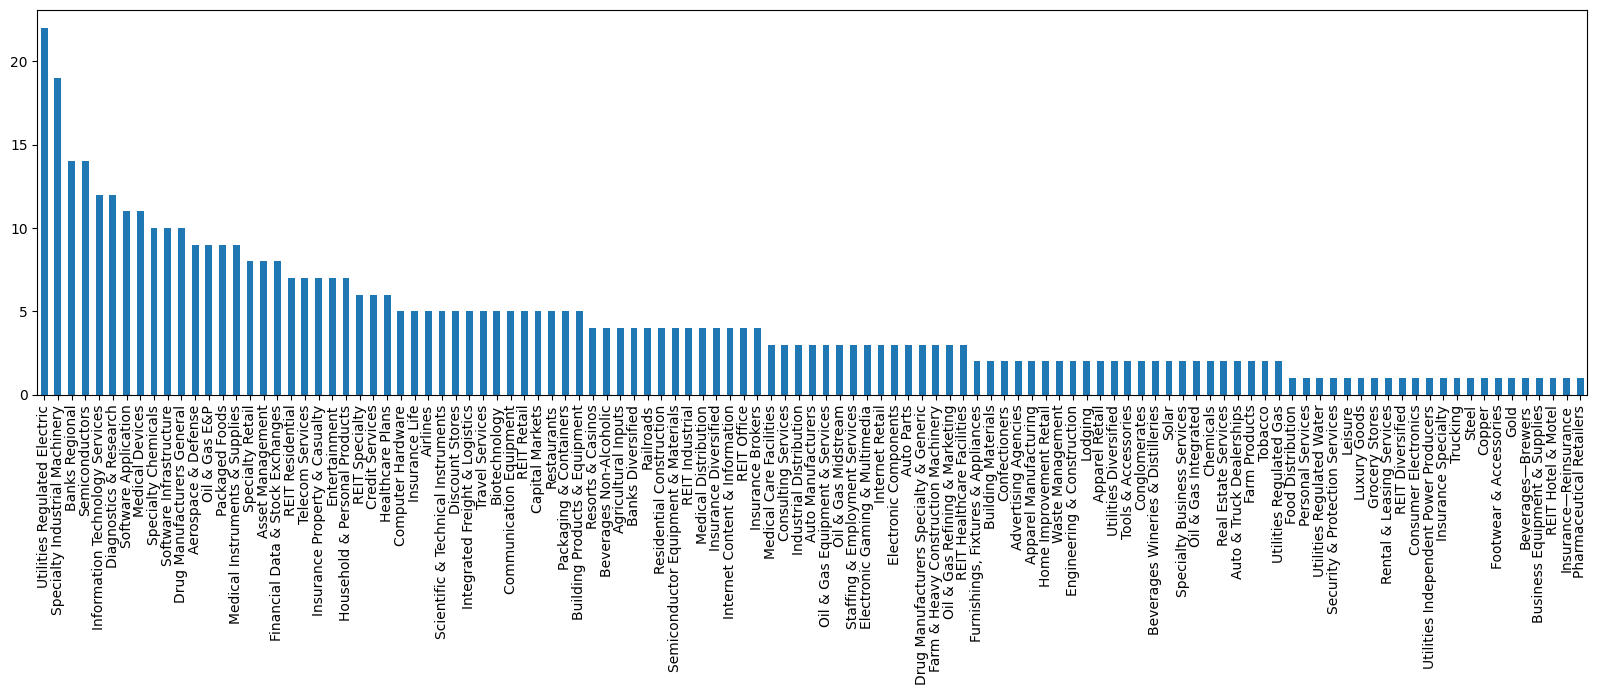

In [69]:
# Create distribution plot of industries 
stocks['industry'].value_counts().plot(x = 'industry', y ='count', kind = 'bar', figsize = (20,5))

Market Cap Distribution 

<AxesSubplot: >

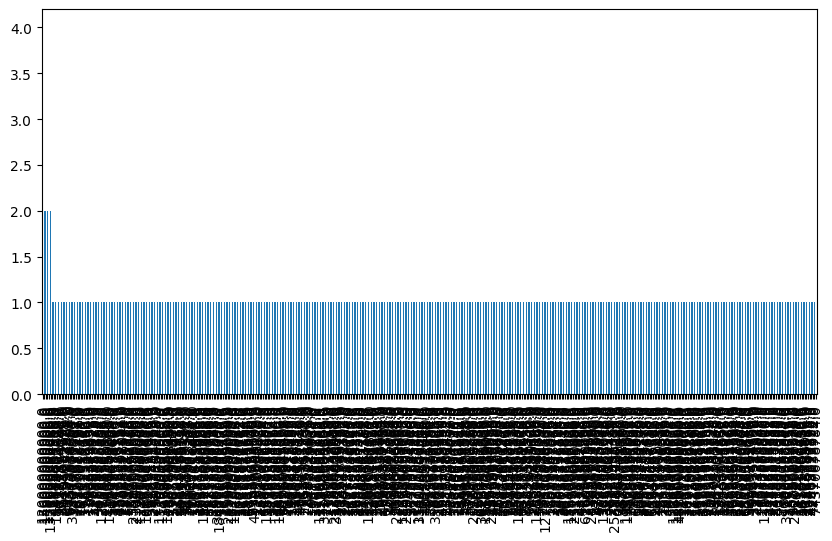

In [70]:
# Create distribution plot of exchanges 
stocks['marketcap'].value_counts().plot(x = 'marketcap', y ='count', kind = 'bar', figsize = (10,5))

Ebidta Distribution

<AxesSubplot: >

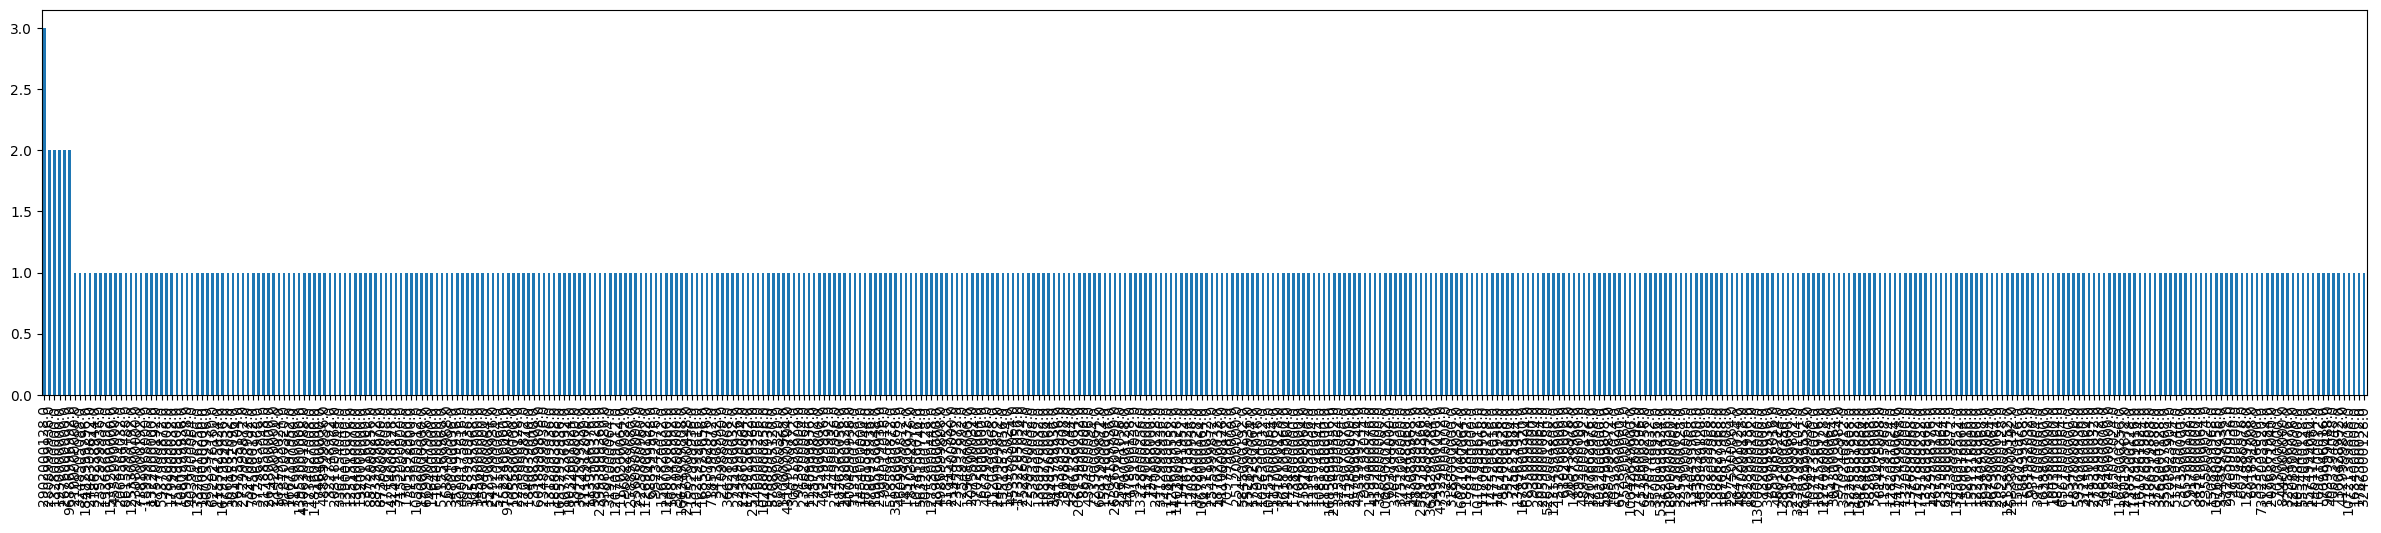

In [71]:
# Create distribution plot of exchanges 
stocks['ebitda'].value_counts().plot(x = 'ebitda', y ='count', kind = 'bar', figsize = (30,5))

Revenue Growth 

<AxesSubplot: >

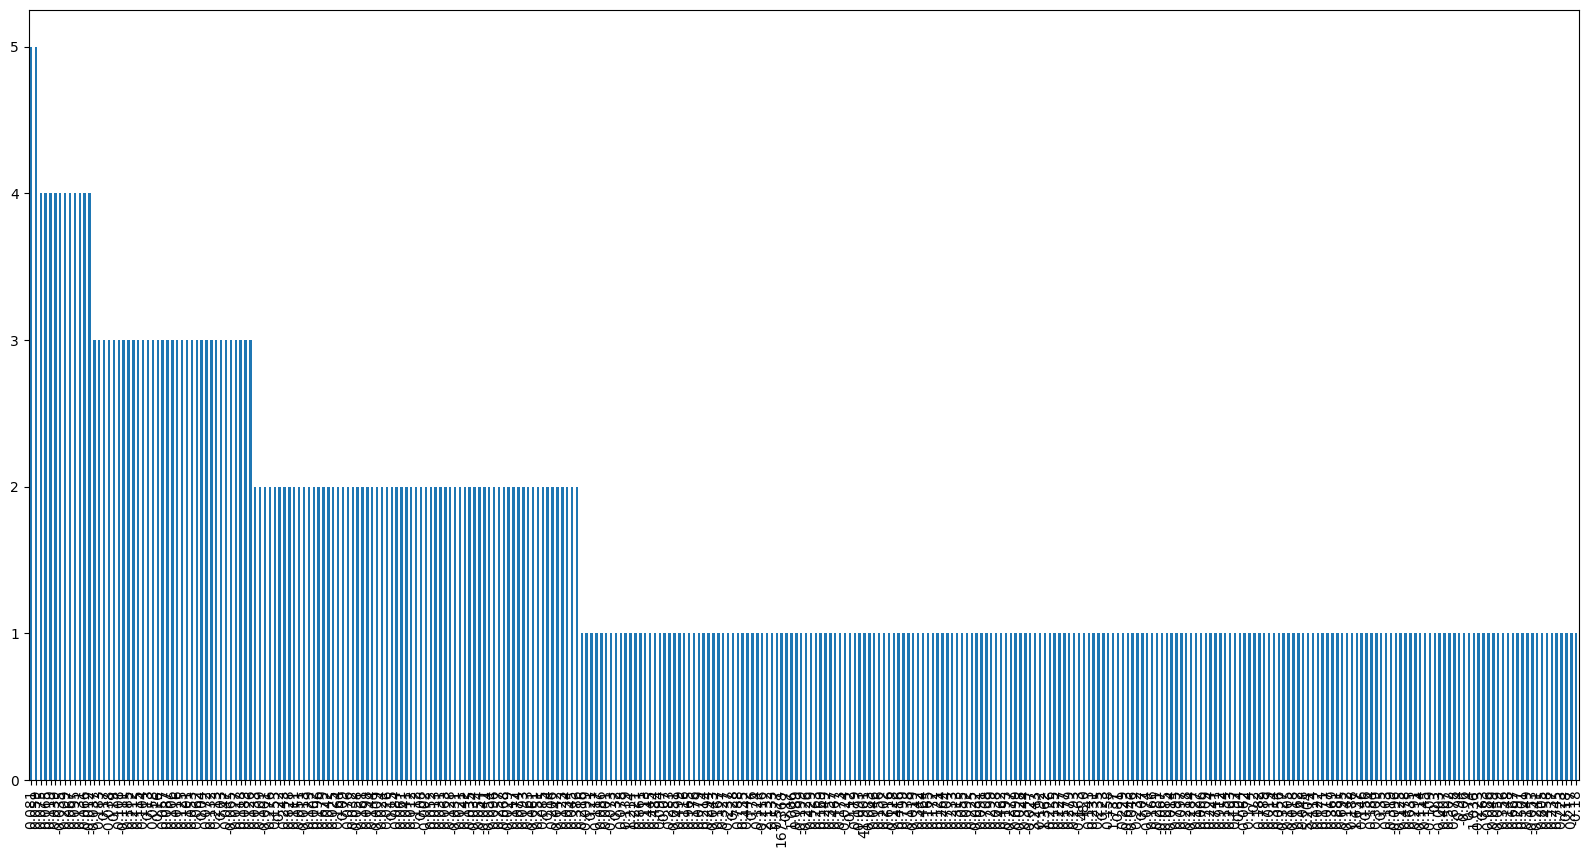

In [72]:
# Create distribution plot of exchanges 
stocks['revenuegrowth'].value_counts().plot(x = 'revenuegrowth', y ='count', kind = 'bar', figsize = (20,10))

City 

<AxesSubplot: >

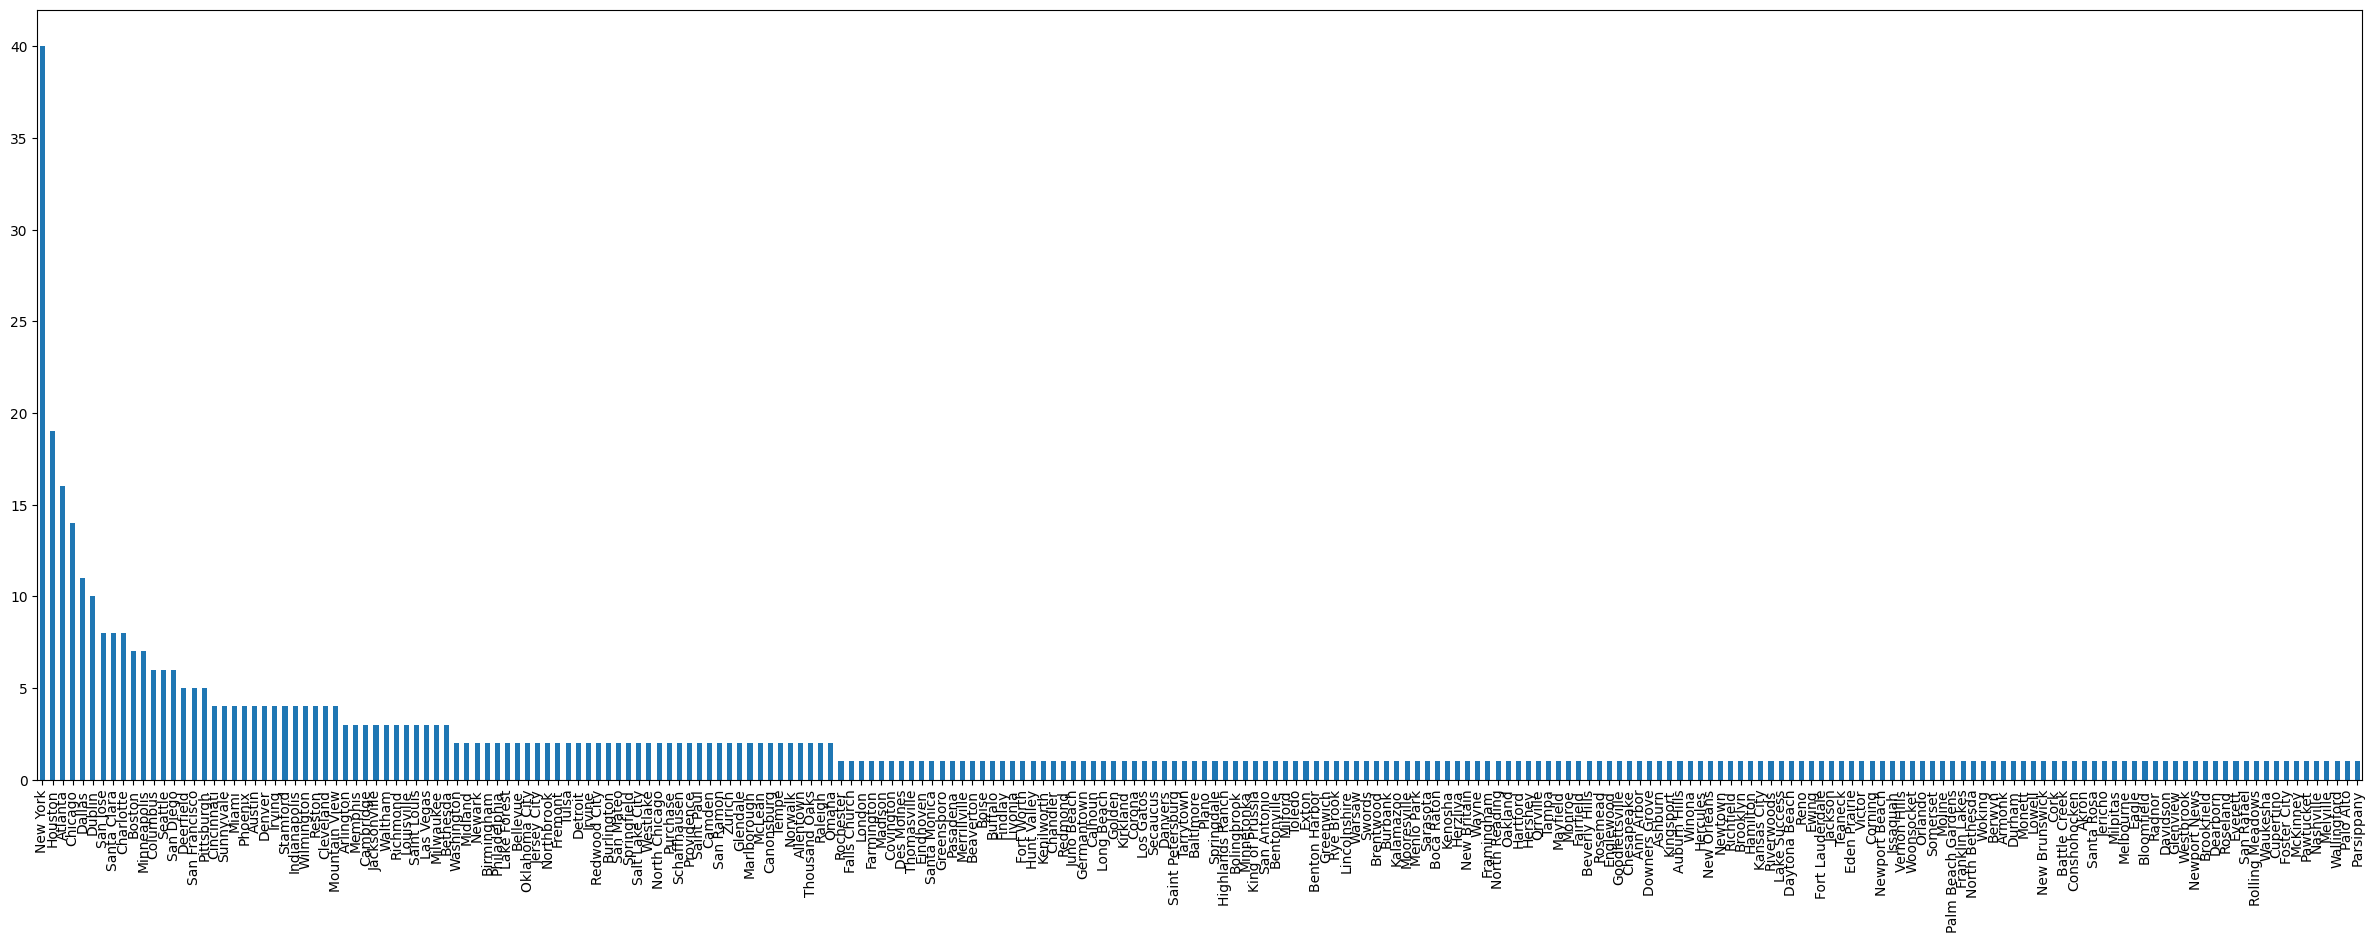

In [73]:
# Create distribution plot of exchanges 
stocks['city'].value_counts().plot(x = 'city', y ='count', kind = 'bar', figsize = (30,10))

State

<AxesSubplot: >

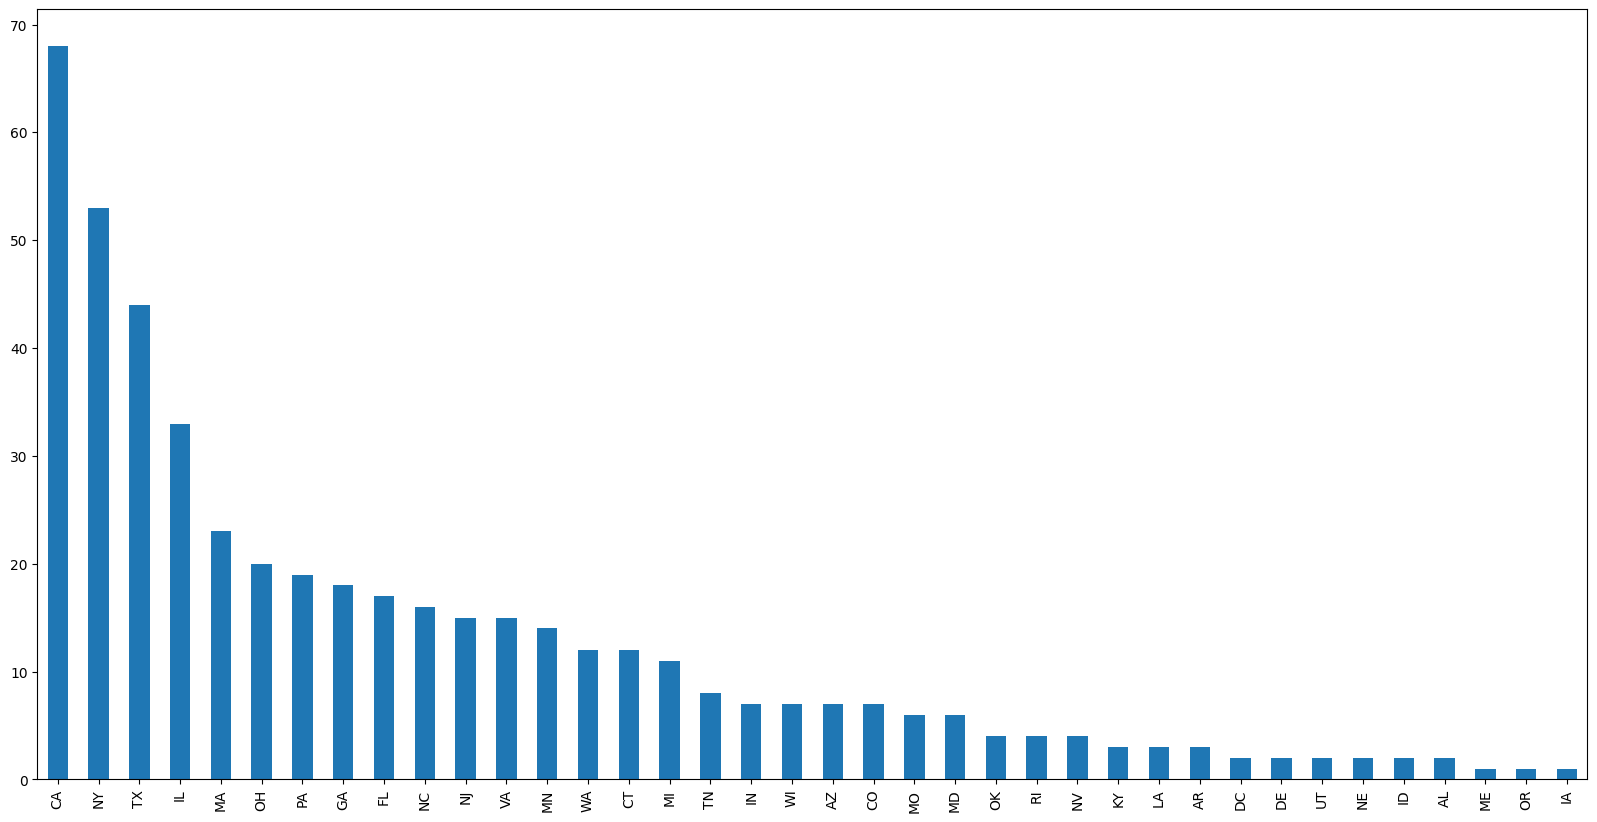

In [74]:
# Create distribution plot of exchanges 
stocks['state'].value_counts().plot(x = 'state', y ='count', kind = 'bar', figsize = (20,10))

Country

<AxesSubplot: >

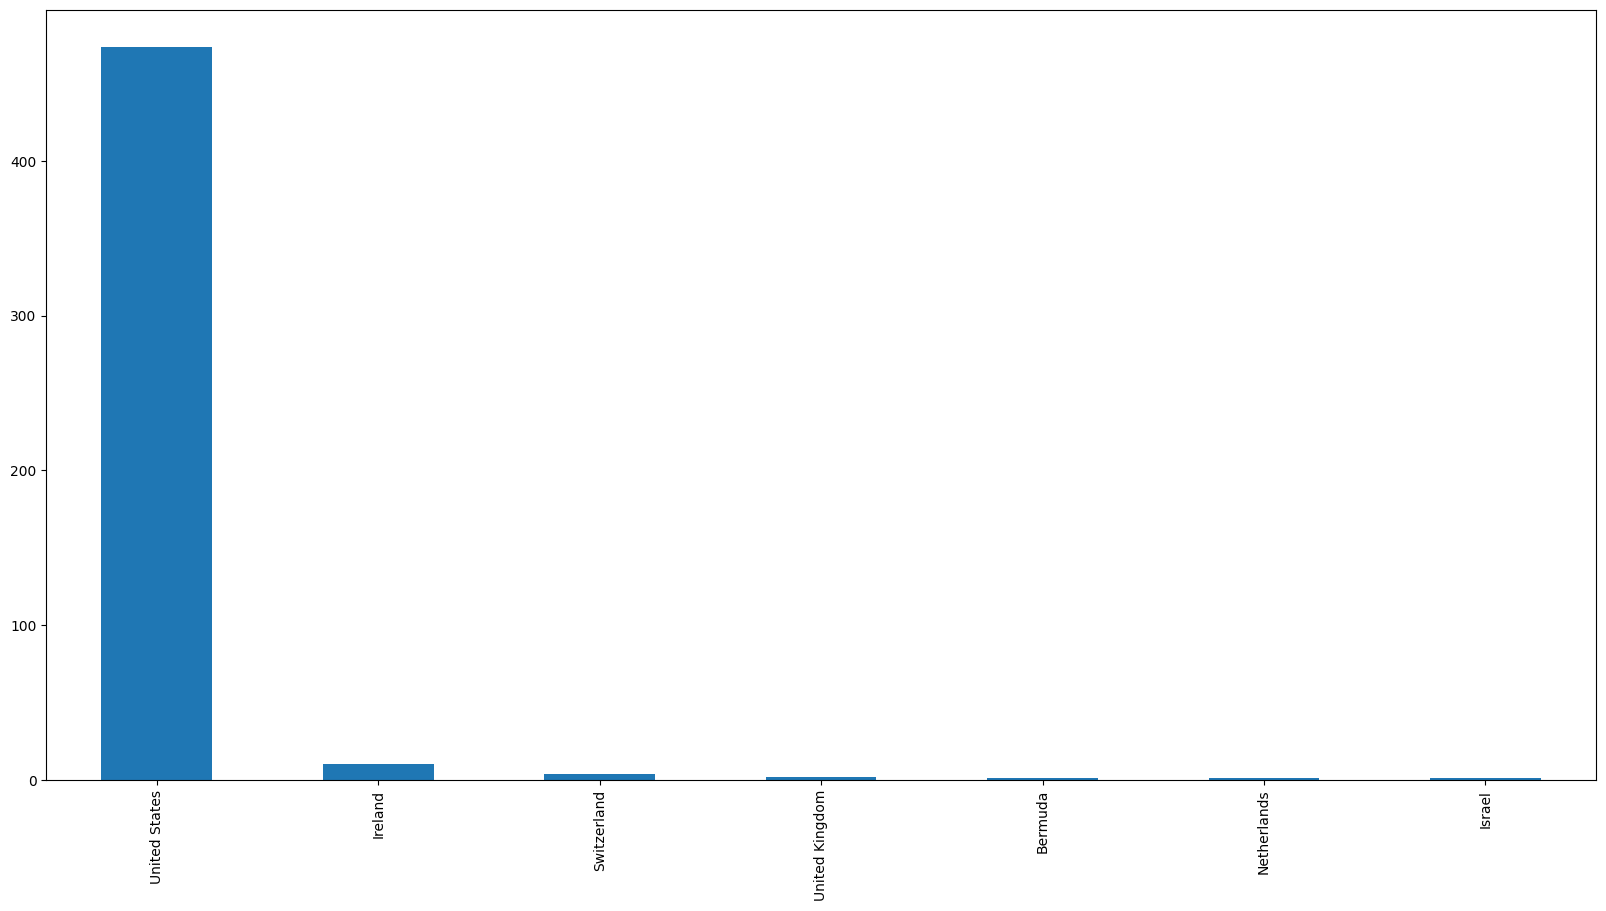

In [75]:
# Create distribution plot of exchanges 
stocks['country'].value_counts().plot(x = 'country', y ='count', kind = 'bar', figsize = (20,10))

Full Time Employees

<AxesSubplot: >

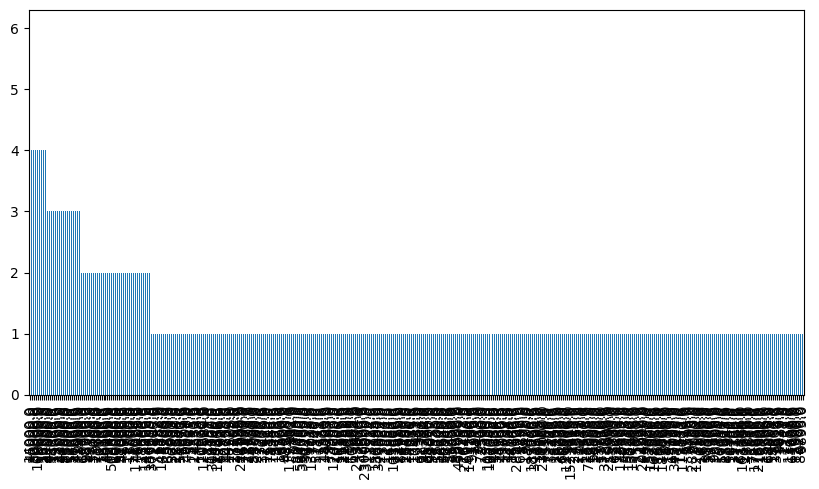

In [76]:
# Create distribution plot of exchanges 
stocks['fulltimeemployees'].value_counts().plot(x = 'state', y ='count', kind = 'bar', figsize = (10,5))

Long Business Summary Word Count Distribution

<AxesSubplot: >

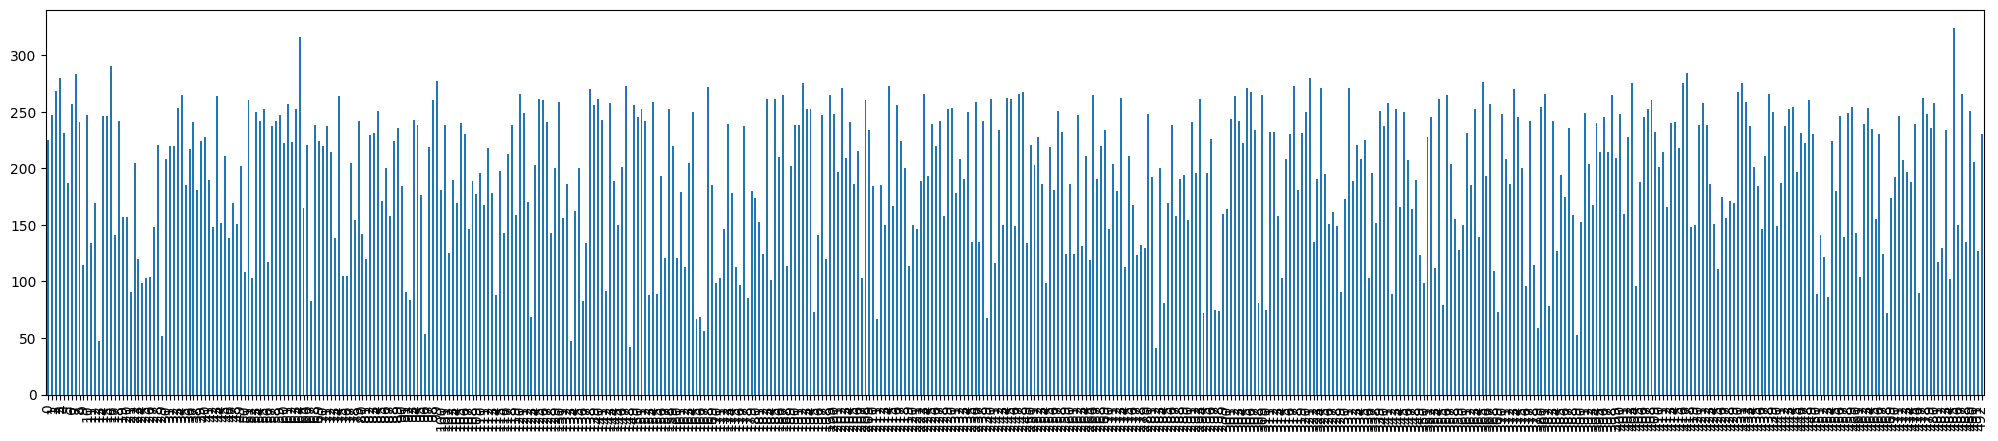

In [77]:
# Create distribution plot of exchanges 
stocks["longbusinesssummary"].apply(lambda n: len(n.split())).plot(x = 'state', y ='count', kind = 'bar', figsize = (25,5))



Long Business Summary Word Count Description (Min, Max, Mean)

In [78]:
stocks["longbusinesssummary"].apply(lambda n: len(n.split())).describe()

count    493.000000
mean     192.933063
std       60.572083
min       41.000000
25%      150.000000
50%      203.000000
75%      244.000000
max      324.000000
Name: longbusinesssummary, dtype: float64

In [79]:
# Create array X of the all long business summaries
X = np.array(stocks.longbusinesssummary)

In [80]:
# Encode the textual data from X into vectors so that we can compute the cosine distance
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)
embed_data = embeddings

Batches: 100%|██████████| 16/16 [01:01<00:00,  3.83s/it]


In [81]:
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,-1.094552,-3.025235,1.445545,-0.679050,-0.555297
1,-1.318476,-1.289023,-2.584360,-1.628613,3.127650
2,-2.478822,-1.561203,-4.145481,-0.558111,2.921947
3,-2.174773,-1.666608,-3.896425,0.295077,3.529454
4,-4.333915,0.252653,2.797526,1.588051,1.798572


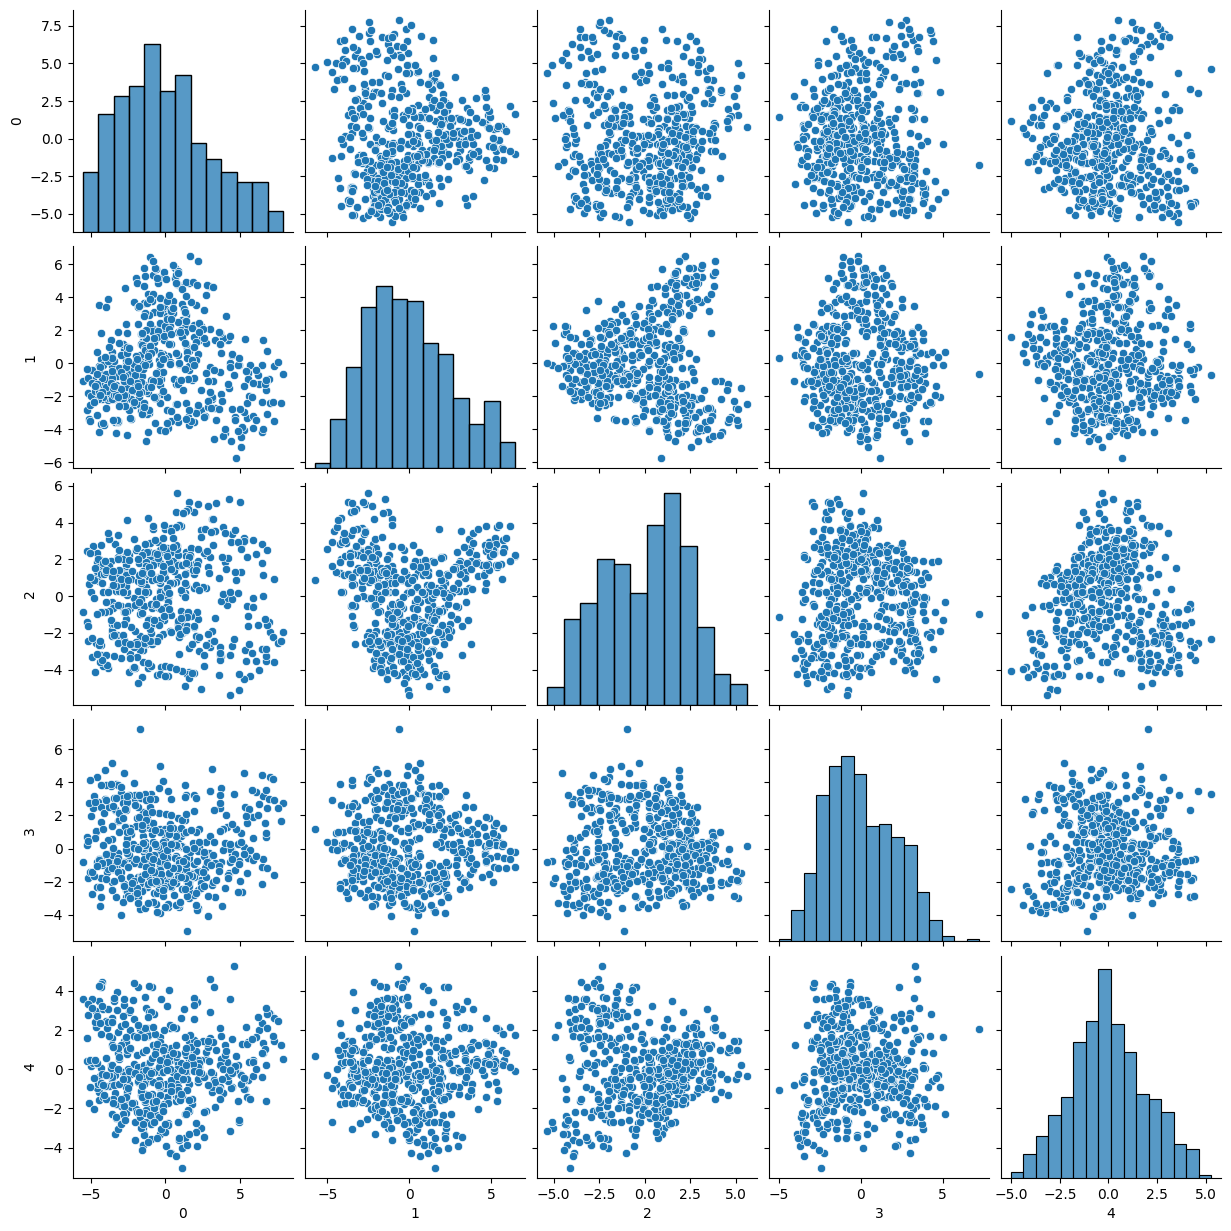

In [82]:
sns.pairplot(pca_data)

Recommender function taken in modified form from:https://towardsdatascience.com/hands-on-content-based-recommender-system-using-python-1d643bf314e4

In [83]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))


def give_recommendations(index, print_recommendation=False, print_recommendation_longbusinesssummary=False, print_sectors=False):
    index_recomm = cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:21]
    stocks_recomm = stocks['symbol'].loc[index_recomm].values
    result = {'Stocks': stocks_recomm, 'Index': index_recomm}
    if print_recommendation == True:
        print('The watched stock is this one: %s \n' %(stocks['symbol'].loc[index]))
        k = 1
        for stock in stocks_recomm:
            print('The number %i recommended stock is this one: %s \n' %(k, stock))
    if print_recommendation_longbusinesssummary == True:
        print('The longbusinesssummary of the watched stock is this one:\n %s \n' %(stocks['longbusinesssummary'].loc[index]))
        k = 1
        for q in range(len(stocks_recomm)):
            plot_q = stocks['longbusinesssummary'].loc[index_recomm[q]]
            print('The longbusinesssummary of the number %i recommended stock is this one:\n %s \n' % (
                k, plot_q))
            k = k+1
    if print_sectors == True:
        print('The sector of the watched stock is this one:\n %s \n' %
              (stocks['sector'].loc[index]))
        k = 1
        for q in range(len(stocks_recomm)):
            plot_q = stocks['sector'].loc[index_recomm[q]]
            print('The sector of the number %i recommended stock is this one:\n %s \n' % (
                k, plot_q))
            k = k+1
    return result

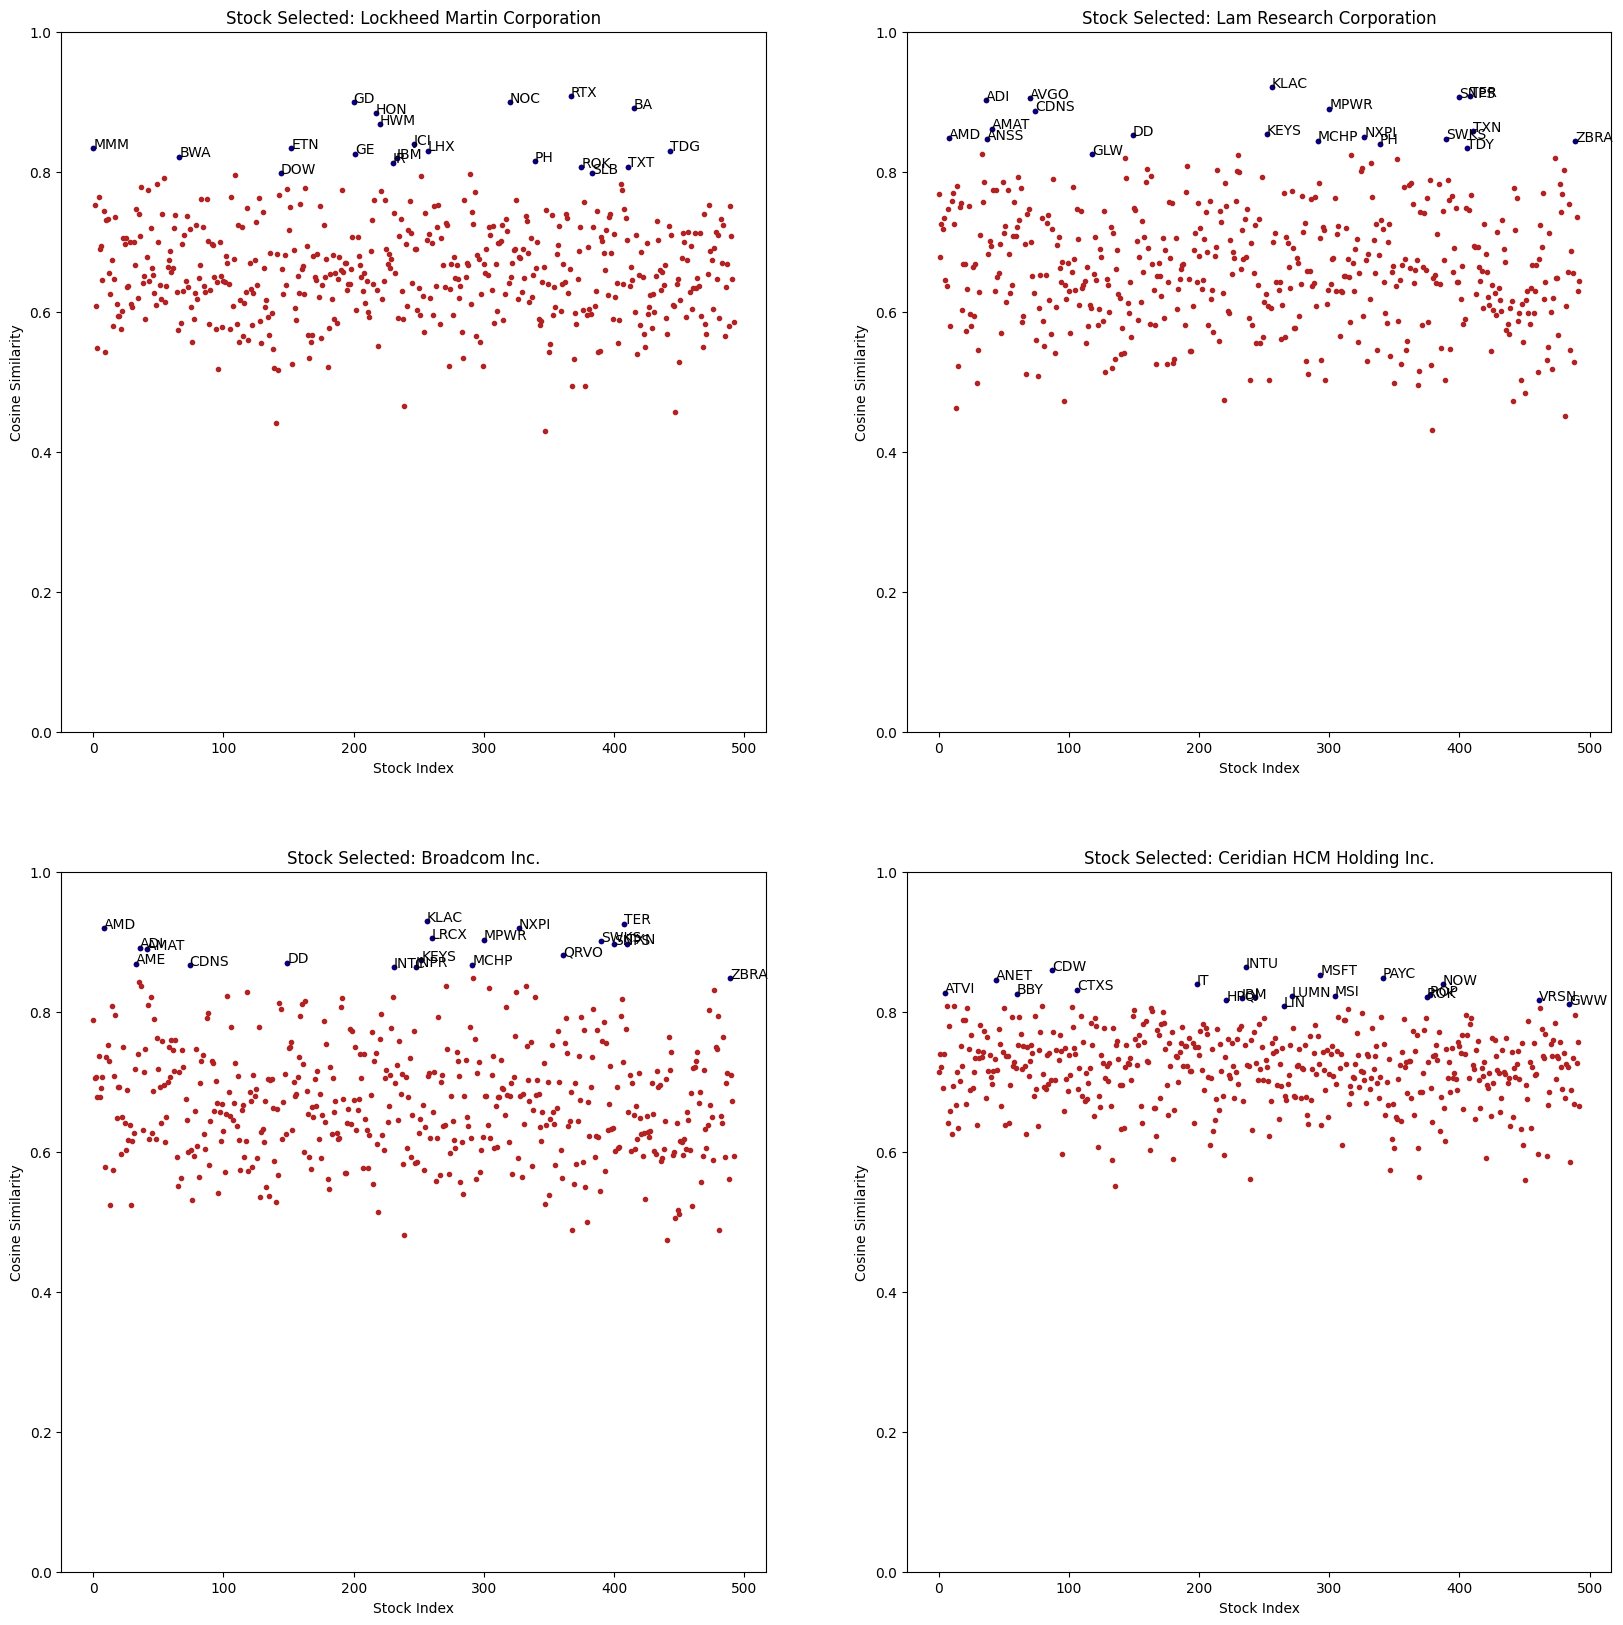

In [84]:
# Randomly selects 4 companies and calculates the top 20 recommendations for each. This is also plotted to visually show cosine sim.
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Stocks']
  plt.plot(x,y,'.',color='navy',label='Recommended Stocks')
  plt.title('Stock Selected: '+stocks['shortname'].loc[index])
  plt.xlabel('Stock Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [85]:
# Test recommendation on one specific company (AAPL)
give_recommendations(40,True, True, True)

The watched stock is this one: AAPL 

The number 1 recommended stock is this one: GOOG 

The number 1 recommended stock is this one: GOOGL 

The number 1 recommended stock is this one: WDC 

The number 1 recommended stock is this one: GRMN 

The number 1 recommended stock is this one: BBY 

The number 1 recommended stock is this one: TMUS 

The number 1 recommended stock is this one: CE 

The number 1 recommended stock is this one: STX 

The number 1 recommended stock is this one: NXPI 

The number 1 recommended stock is this one: NVDA 

The number 1 recommended stock is this one: QRVO 

The number 1 recommended stock is this one: MCHP 

The number 1 recommended stock is this one: VZ 

The number 1 recommended stock is this one: SWKS 

The number 1 recommended stock is this one: INTC 

The number 1 recommended stock is this one: HPQ 

The number 1 recommended stock is this one: AVY 

The number 1 recommended stock is this one: MSI 

The number 1 recommended stock is this one: TTWO 

Th

{'Stocks': array(['GOOG', 'GOOGL', 'WDC', 'GRMN', 'BBY', 'TMUS', 'CE', 'STX', 'NXPI',
        'NVDA', 'QRVO', 'MCHP', 'VZ', 'SWKS', 'INTC', 'HPQ', 'AVY', 'MSI',
        'TTWO', 'ANET'], dtype=object),
 'Index': [20,
  19,
  477,
  197,
  60,
  440,
  88,
  384,
  327,
  325,
  361,
  291,
  463,
  390,
  231,
  221,
  53,
  304,
  402,
  44]}

Record recommendation results into Pandas DF

In [86]:
recomm_list = []
for i in range(len(X)):
    recomm_i = give_recommendations(i)
    recomm_list.append(recomm_i['Stocks'])
recomm_data = pd.DataFrame(recomm_list, columns=['1', '2', '3', '4', '5', ' 6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])
recomm_data['Target'] = stocks['symbol']
recomm_data = recomm_data[['Target', '1', '2', '3', '4', '5', ' 6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']]
